In [17]:
# Summarize the German Credit dataset
import pandas as pd
dataframe = pd.read_csv("C:\\Users\\amanr\\OneDrive\\Desktop\\german_credit.csv")

In [18]:
dataframe.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [19]:
dataframe["Creditability"].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

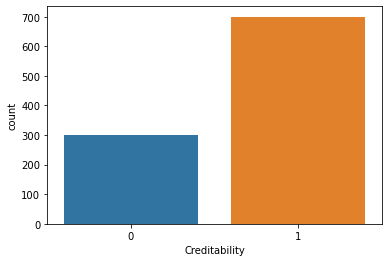

In [33]:
import seaborn as sns
sns.countplot(dataframe["Creditability"])
plt.savefig('filename.png')

In [5]:
#!pip install imblearn

In [21]:
import imblearn

In [22]:
from collections import Counter

In [23]:
X = dataframe.drop(["Creditability"],axis=1)
y = dataframe["Creditability"]

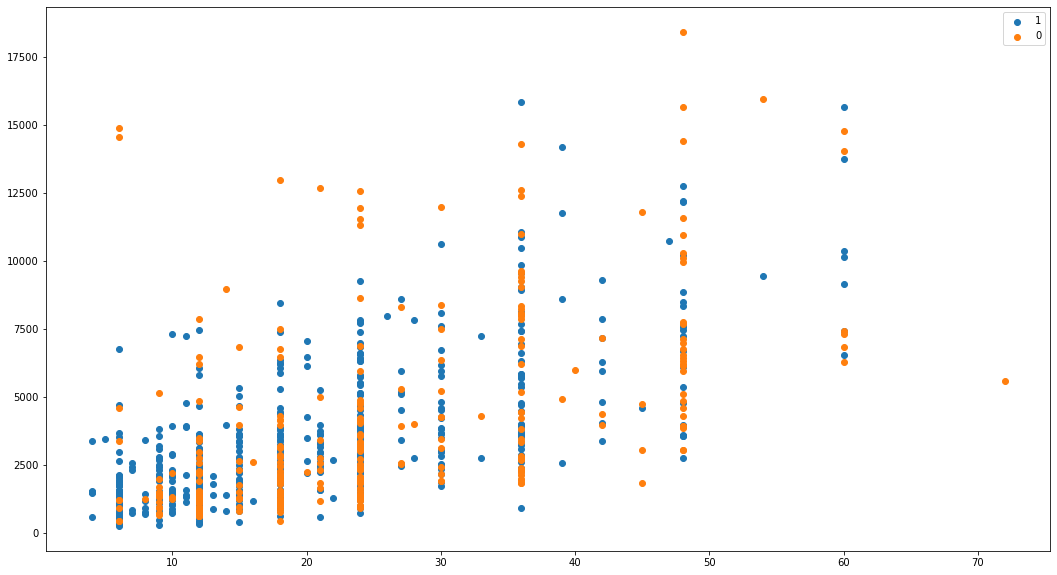

In [24]:
# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y)
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X.loc[row_ix, "Duration of Credit (month)"], X.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.savefig('Original.png')
plt.show()


# Undersampling 1 - Random

After undersample dataset shape Counter({0: 300, 1: 300})


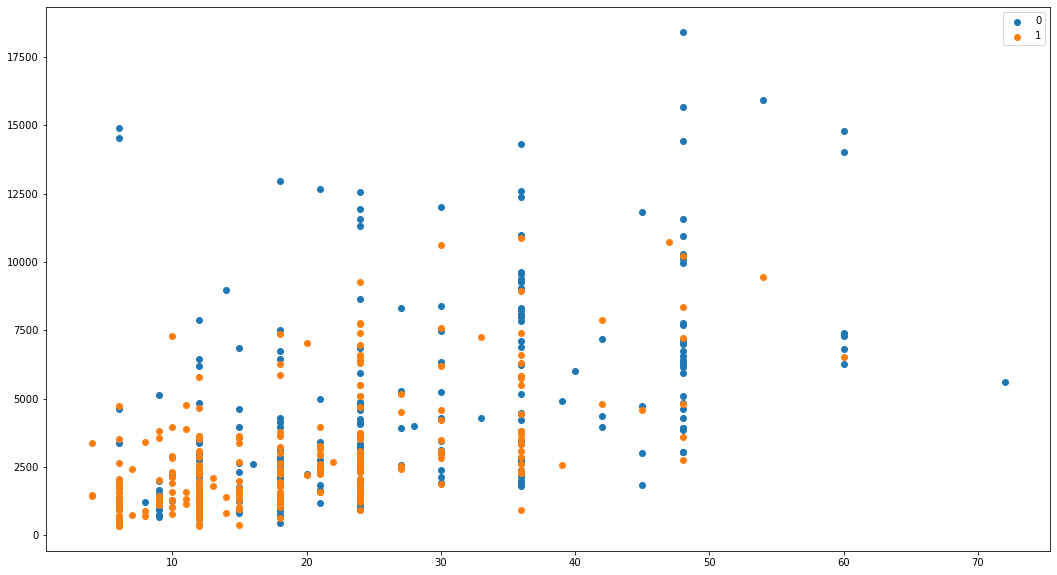

In [25]:
from imblearn.under_sampling import RandomUnderSampler 
rs = RandomUnderSampler(random_state=42)

#print('Original dataset shape %s' % Counter(y))

X_res, y_res = rs.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))

# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = np.where(y_res == label)[0]
    plt.scatter(X_res.loc[row_ix, "Duration of Credit (month)"], X_res.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.show()

# Undersampling 2 - Centriod

Original dataset shape Counter({1: 700, 0: 300})
After undersample dataset shape Counter({0: 300, 1: 300})


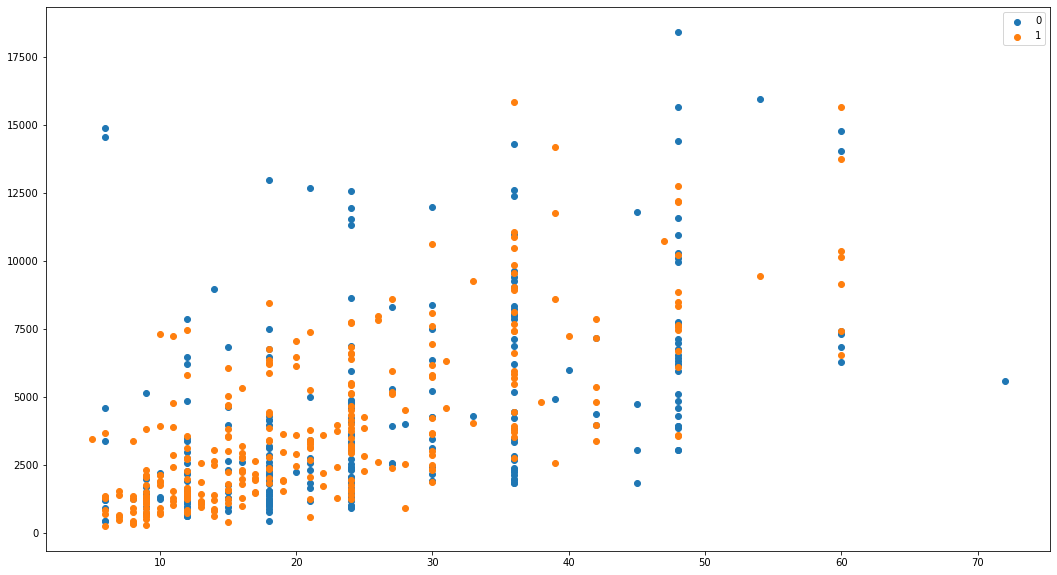

In [26]:
from imblearn.under_sampling import ClusterCentroids 
cc = ClusterCentroids(random_state=42)

print('Original dataset shape %s' % Counter(y))

X_res, y_res = cc.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))

# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = np.where(y_res == label)[0]
    plt.scatter(X_res.loc[row_ix, "Duration of Credit (month)"], X_res.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.show()

# Undersampling 3 - ENN

Original dataset shape Counter({1: 700, 0: 300})
After undersample dataset shape Counter({0: 300, 1: 271})


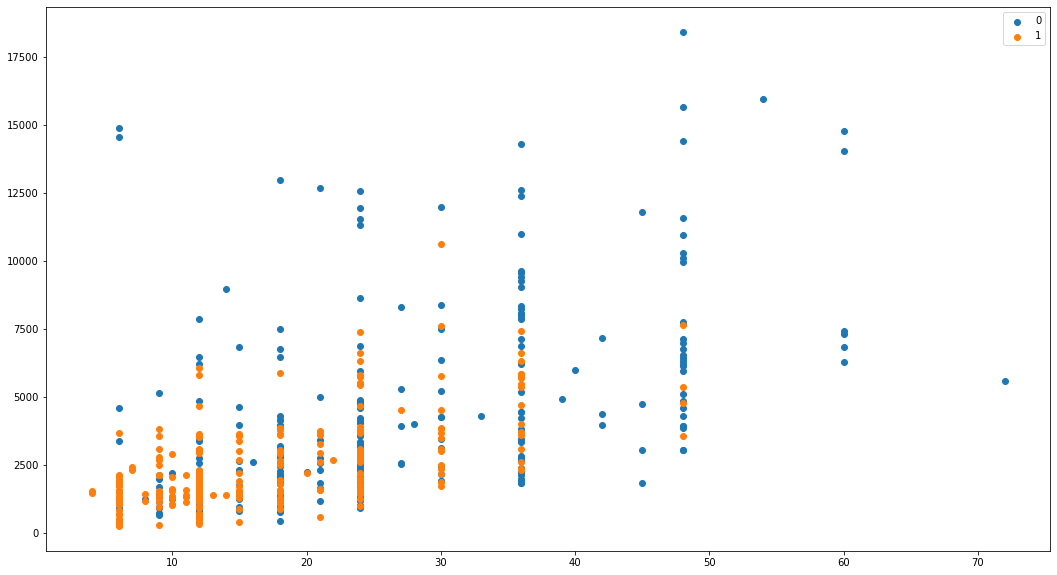

In [27]:
from imblearn.under_sampling import EditedNearestNeighbours
ENN = EditedNearestNeighbours()

print('Original dataset shape %s' % Counter(y))

X_res, y_res = ENN.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))


# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = np.where(y_res == label)[0]
    plt.scatter(X_res.loc[row_ix, "Duration of Credit (month)"], X_res.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.show()

# Oversampling 1 - Random

Original dataset shape Counter({1: 700, 0: 300})
After undersample dataset shape Counter({1: 700, 0: 700})


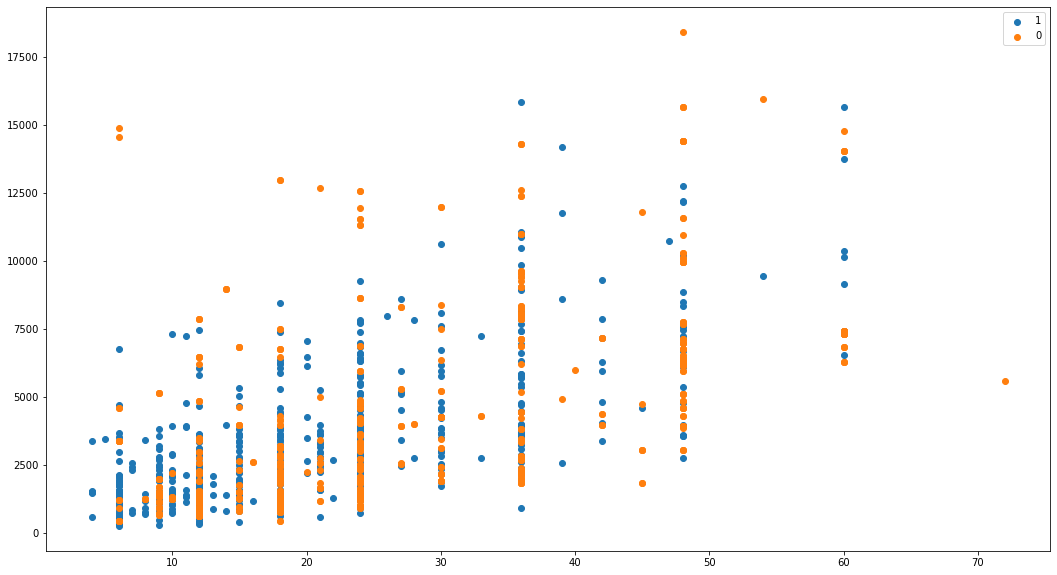

In [28]:
from imblearn.over_sampling import RandomOverSampler 
ROS = RandomOverSampler()

print('Original dataset shape %s' % Counter(y))

X_res, y_res = ROS.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))


# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = np.where(y_res == label)[0]
    plt.scatter(X_res.loc[row_ix, "Duration of Credit (month)"], X_res.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.show()

# Oversampling 2 - SMOTE

Original dataset shape Counter({1: 700, 0: 300})
After undersample dataset shape Counter({1: 700, 0: 700})


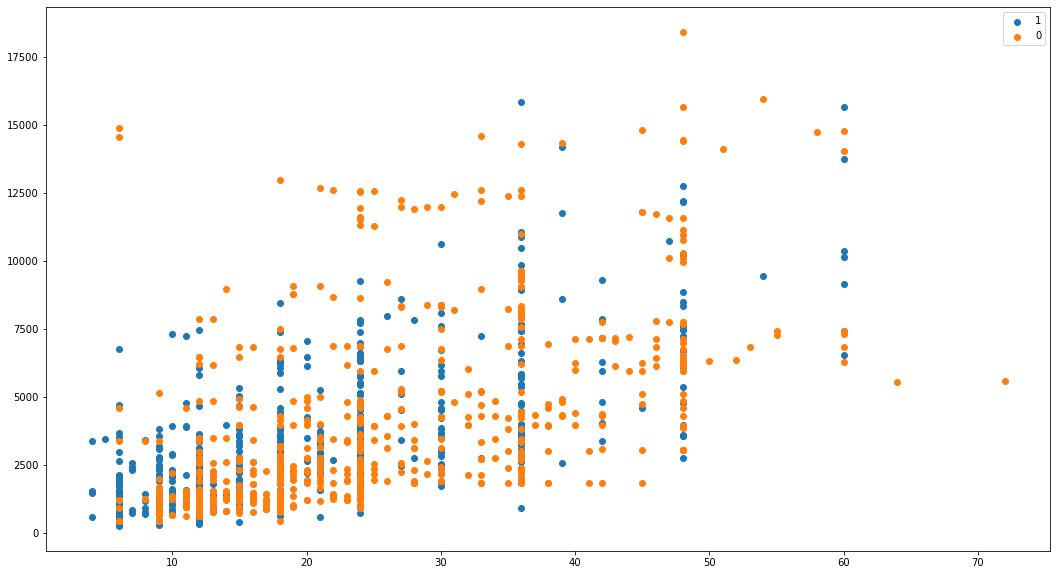

In [29]:
from imblearn.over_sampling import SMOTE 
SMOTE = SMOTE()

print('Original dataset shape %s' % Counter(y))

X_res, y_res = SMOTE.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))


# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = np.where(y_res == label)[0]
    plt.scatter(X_res.loc[row_ix, "Duration of Credit (month)"], X_res.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.show()

# Mix of undersample and oversample - SMOTEENN

Original dataset shape Counter({1: 700, 0: 300})
After undersample dataset shape Counter({0: 307, 1: 209})


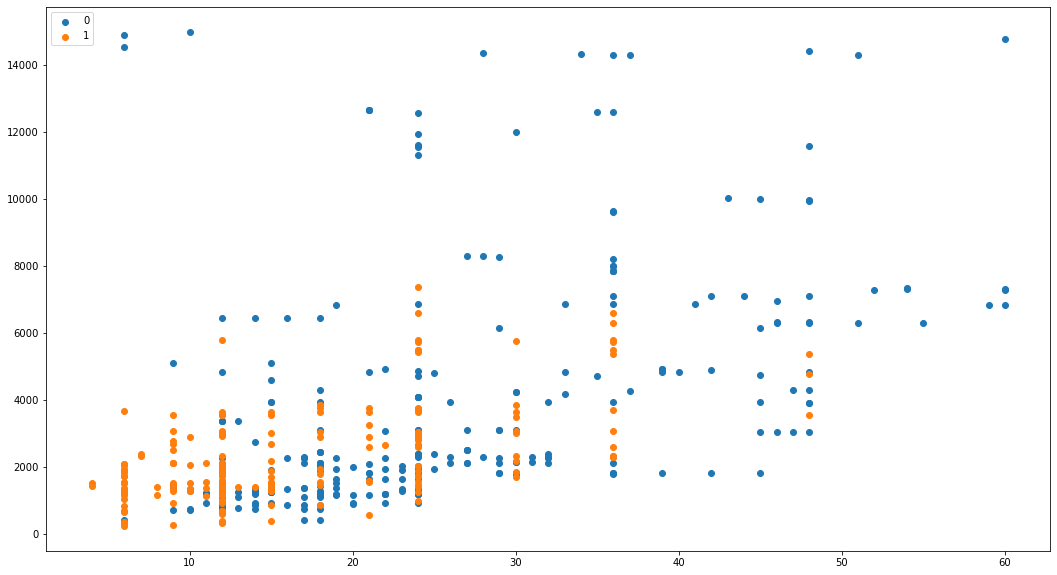

In [30]:
from imblearn.combine import SMOTEENN 
SMOTEENN = SMOTEENN()

print('Original dataset shape %s' % Counter(y))

X_res, y_res = SMOTEENN.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res))


# scatter plot by class label
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
import numpy as np
counter = Counter(y_res)
for label, _ in counter.items():
    row_ix = np.where(y_res == label)[0]
    plt.scatter(X_res.loc[row_ix, "Duration of Credit (month)"], X_res.loc[row_ix,"Credit Amount"], label=str(label))
plt.legend()
plt.show()

#Learn about SMOTETOMEK

# Ensemble Method 1 - EasyEnsembleClassifier

In [31]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
print('Original dataset shape %s' % Counter(y))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, y_train) 
y_pred = eec.predict(X_test)
print(confusion_matrix(y_test, y_pred))

Original dataset shape Counter({1: 700, 0: 300})
[[ 58  25]
 [ 49 118]]


# Learn about other methods form imblean page

# Keras and Tensorflow support from imblean page